In [27]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [14]:
import os, torch
from torch.nn import Linear
import torch.nn.functional as F

In [2]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

In [12]:
dataset = Planetoid(root=os.path.join('data_processing','neural_networks', 'data', 'Planetoid'), name='Cora', transform=NormalizeFeatures())
print(f'{dataset.num_features = }, {dataset.num_classes = }')

dataset.num_features = 1433, dataset.num_classes = 7


In [13]:
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [21]:
class MLP(torch.nn.Module):
    def __init__(self, hidden_channels) -> None:
        super().__init__()
        torch.manual_seed(69)
        self.lin1 = Linear(dataset.num_features,hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x
    
MLP(hidden_channels=16)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)

In [22]:
model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()
optimizer  = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    out  = model(data.x)
    pred = out.argmax(dim = 1)
    test_correct = pred[data.train_mask] == data.y[data.train_mask]
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc

for epoch in range(1,201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:0.4f}')
    

Epoch: 001, Loss: 1.9644
Epoch: 002, Loss: 1.9599
Epoch: 003, Loss: 1.9530
Epoch: 004, Loss: 1.9478
Epoch: 005, Loss: 1.9397
Epoch: 006, Loss: 1.9354
Epoch: 007, Loss: 1.9305
Epoch: 008, Loss: 1.9185
Epoch: 009, Loss: 1.9001
Epoch: 010, Loss: 1.8923
Epoch: 011, Loss: 1.8838
Epoch: 012, Loss: 1.8649
Epoch: 013, Loss: 1.8652
Epoch: 014, Loss: 1.8502
Epoch: 015, Loss: 1.8378
Epoch: 016, Loss: 1.8219
Epoch: 017, Loss: 1.8077
Epoch: 018, Loss: 1.7918
Epoch: 019, Loss: 1.7670
Epoch: 020, Loss: 1.7497
Epoch: 021, Loss: 1.7452
Epoch: 022, Loss: 1.7266
Epoch: 023, Loss: 1.7069
Epoch: 024, Loss: 1.6598
Epoch: 025, Loss: 1.6440
Epoch: 026, Loss: 1.6344
Epoch: 027, Loss: 1.6191
Epoch: 028, Loss: 1.6130
Epoch: 029, Loss: 1.5523
Epoch: 030, Loss: 1.5560
Epoch: 031, Loss: 1.5464
Epoch: 032, Loss: 1.5175
Epoch: 033, Loss: 1.4732
Epoch: 034, Loss: 1.4781
Epoch: 035, Loss: 1.4681
Epoch: 036, Loss: 1.3730
Epoch: 037, Loss: 1.3833
Epoch: 038, Loss: 1.3308
Epoch: 039, Loss: 1.2983
Epoch: 040, Loss: 1.3086


In [23]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.1400


In [25]:
from torch_geometric.nn import GCNConv

In [28]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels) -> None:
        super().__init__()
        torch.manual_seed(69)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p = 0.5, training = self.training)
        x = self.conv2(x, edge_index)
        return x
    
model = GCN(hidden_channels=16)
model


GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)

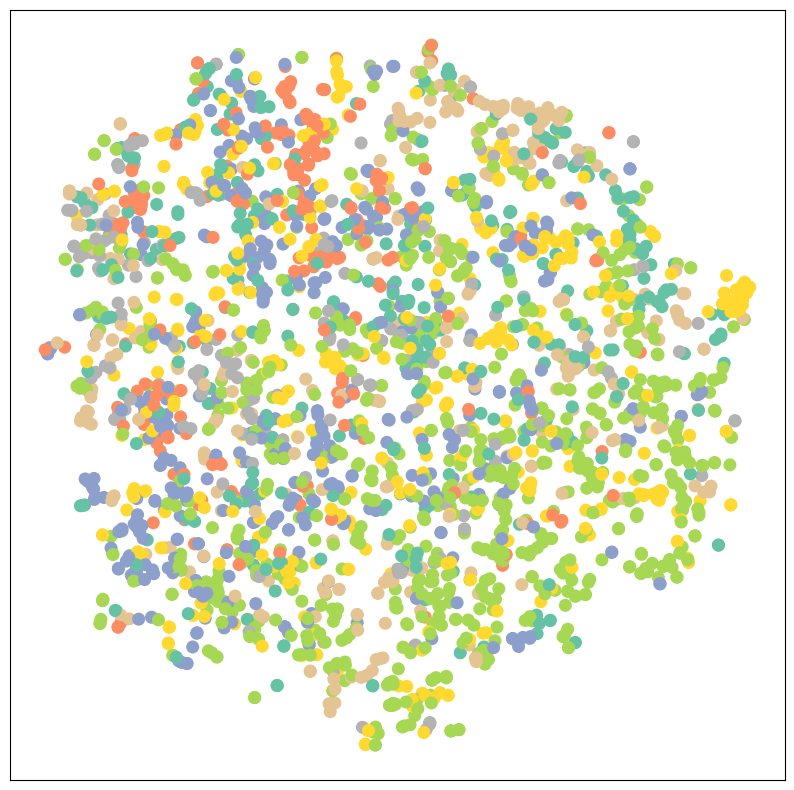

In [29]:
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color = data.y)

In [30]:
criterion = torch.nn.CrossEntropyLoss()
optimizer  = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    out  = model(data.x, data.edge_index)
    pred = out.argmax(dim = 1)
    test_correct = pred[data.train_mask] == data.y[data.train_mask]
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc

for epoch in range(1,201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:0.4f}')

Epoch: 001, Loss: 1.9456
Epoch: 002, Loss: 1.9378
Epoch: 003, Loss: 1.9322
Epoch: 004, Loss: 1.9222
Epoch: 005, Loss: 1.9132
Epoch: 006, Loss: 1.9000
Epoch: 007, Loss: 1.8918
Epoch: 008, Loss: 1.8886
Epoch: 009, Loss: 1.8686
Epoch: 010, Loss: 1.8574
Epoch: 011, Loss: 1.8447
Epoch: 012, Loss: 1.8220
Epoch: 013, Loss: 1.8114
Epoch: 014, Loss: 1.7970
Epoch: 015, Loss: 1.7891
Epoch: 016, Loss: 1.7660
Epoch: 017, Loss: 1.7466
Epoch: 018, Loss: 1.7315
Epoch: 019, Loss: 1.7212
Epoch: 020, Loss: 1.6828
Epoch: 021, Loss: 1.6860
Epoch: 022, Loss: 1.6530
Epoch: 023, Loss: 1.6344
Epoch: 024, Loss: 1.6159
Epoch: 025, Loss: 1.5962
Epoch: 026, Loss: 1.5815
Epoch: 027, Loss: 1.5592
Epoch: 028, Loss: 1.5461
Epoch: 029, Loss: 1.5228
Epoch: 030, Loss: 1.4930
Epoch: 031, Loss: 1.4565
Epoch: 032, Loss: 1.4638
Epoch: 033, Loss: 1.4063
Epoch: 034, Loss: 1.3907
Epoch: 035, Loss: 1.3773
Epoch: 036, Loss: 1.3766
Epoch: 037, Loss: 1.3380
Epoch: 038, Loss: 1.3335
Epoch: 039, Loss: 1.2795
Epoch: 040, Loss: 1.2810


In [31]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.1400


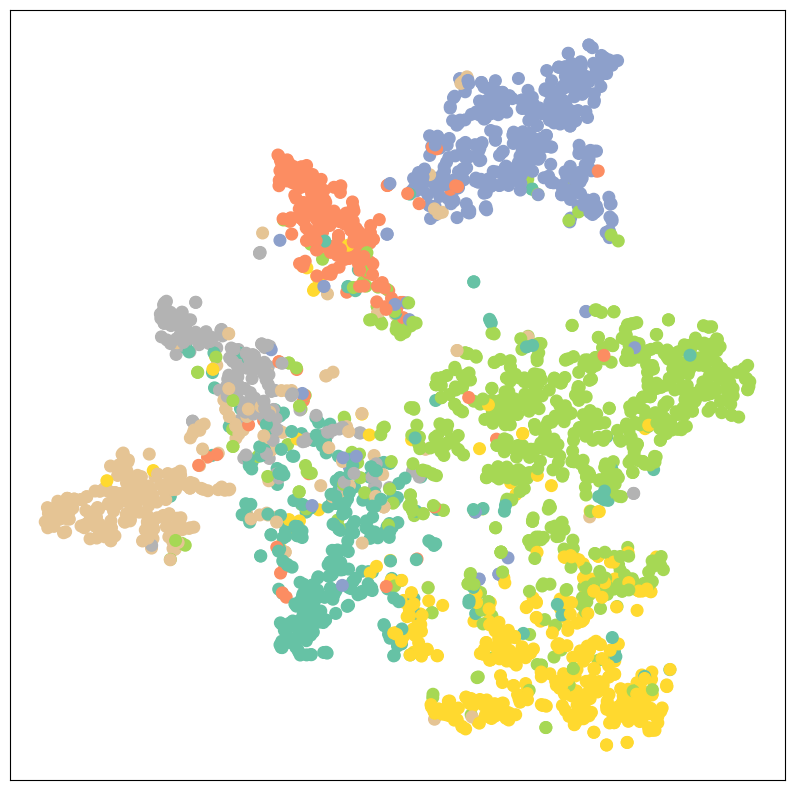

In [32]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)